In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/factorem1337/multiclass_classifierNN/master/data.csv'
data = pd.read_csv(url)

In [ ]:
feature_df = data.iloc[0:3000,0:784]
label_df = data['label']

X = np.asarray(feature_df)
y = np.asarray(label_df)

X_train1, X_test1, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4) # 20 percent of data kept aside for testing purposes

X_train = (X_train1/255) -0.5
X_test = (X_test1/255) - 0.5 

## Regularization

In [ ]:
def neural_net_l2reg(lam,input_neurons, output_neurons, hidden_layers, neu_in_first_hid_lay, neu_in_seco_hid_lay,
               input_layer_activation_function, hidden_layers_activation_function, output_layer_activation_function):
    
  if hidden_layers == 1:
      model = tf.keras.models.Sequential()
      model.add(tf.keras.layers.Dense(units=input_neurons,activation=input_layer_activation_function,input_shape=(input_neurons,)))
      model.add(tf.keras.layers.Dense(units=neu_in_first_hid_lay,kernel_regularizer=tf.keras.regularizers.l2(l=lam),activation=hidden_layers_activation_function))
      model.add(tf.keras.layers.Dense(units=output_neurons,activation=output_layer_activation_function))
  
  if hidden_layers == 2:
      model = tf.keras.models.Sequential()
      model.add(tf.keras.layers.Dense(units=input_neurons,activation=input_layer_activation_function,input_shape=(input_neurons,)))
      model.add(tf.keras.layers.Dense(units=neu_in_first_hid_lay,kernel_regularizer=tf.keras.regularizers.l2(l=lam),activation=hidden_layers_activation_function))
      model.add(tf.keras.layers.Dense(units=neu_in_seco_hid_lay,kernel_regularizer=tf.keras.regularizers.l2(l=lam),activation=hidden_layers_activation_function))
      model.add(tf.keras.layers.Dense(units=output_neurons,activation=output_layer_activation_function))

  model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

  return model

In [ ]:
lam = np.linspace(1e-7,1e-3,50)

train_accuracy = []
test_accuracy = []
test_loss = []
train_loss = []

for i in range(len(lam)):

  print("")
  print(i)
  print("")
  model = neural_net_l2reg(lam[i],784,10,2,30,25,"relu","relu","softmax")
  model_fit = model.fit(X_train,y_train,epochs=25,batch_size=128)

  train_accuracy.append(model_fit.history['accuracy'][24])
  train_loss.append(model_fit.history['loss'][24])
  model_test = model.evaluate(X_test,y_test)
  test_accuracy.append(model_test[1])
  test_loss.append(model_test[0])


0

Epoch 1/25
19/19 [==============================] - 0s 9ms/step - loss: 1.7707 - accuracy: 0.3596
Epoch 2/25
19/19 [==============================] - 0s 10ms/step - loss: 1.0154 - accuracy: 0.6837
Epoch 3/25
19/19 [==============================] - 0s 9ms/step - loss: 0.6371 - accuracy: 0.8154
Epoch 4/25
19/19 [==============================] - 0s 11ms/step - loss: 0.4781 - accuracy: 0.8712
Epoch 5/25
19/19 [==============================] - 0s 9ms/step - loss: 0.4063 - accuracy: 0.8754
Epoch 6/25
19/19 [==============================] - 0s 9ms/step - loss: 0.3270 - accuracy: 0.9050
Epoch 7/25
19/19 [==============================] - 0s 10ms/step - loss: 0.2787 - accuracy: 0.9246
Epoch 8/25
19/19 [==============================] - 0s 10ms/step - loss: 0.2563 - accuracy: 0.9271
Epoch 9/25
19/19 [==============================] - 0s 9ms/step - loss: 0.2281 - accuracy: 0.9367
Epoch 10/25
19/19 [==============================] - 0s 10ms/step - loss: 0.1986 - accuracy: 0.9442
Epoch 11/2

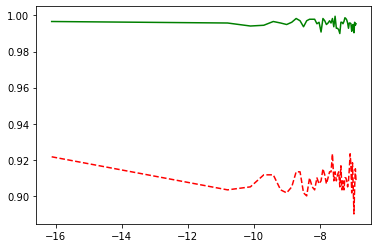

In [ ]:
plt.plot(np.log(lam),train_accuracy,color='green')
plt.plot(np.log(lam),test_accuracy,'--',color='red')

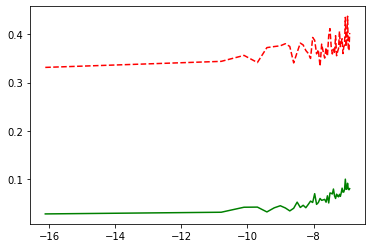

In [ ]:
plt.plot(np.log(lam),train_loss,color='green')
plt.plot(np.log(lam),test_loss,'--',color='red')

## Regularization with a 2 hidden layer neural network with 150 neurons in first hidden layer and 100 in second hidden layer

In [ ]:
lam = np.linspace(1e-5,1e-2,50)

train_accuracy = []
test_accuracy = []
test_loss = []
train_loss = []

for i in range(len(lam)):

  print("")
  print(i)
  print("")
  model = neural_net_l2reg(lam[i],784,10,2,150,100,"relu","relu","softmax")
  model_fit = model.fit(X_train,y_train,epochs=25,batch_size=128)

  train_accuracy.append(model_fit.history['accuracy'][24])
  train_loss.append(model_fit.history['loss'][24])
  model_test = model.evaluate(X_test,y_test)
  test_accuracy.append(model_test[1])
  test_loss.append(model_test[0])


0

Epoch 1/25
19/19 [==============================] - 0s 13ms/step - loss: 1.3686 - accuracy: 0.5850
Epoch 2/25
19/19 [==============================] - 0s 11ms/step - loss: 0.5431 - accuracy: 0.8421
Epoch 3/25
19/19 [==============================] - 0s 11ms/step - loss: 0.3839 - accuracy: 0.8842
Epoch 4/25
19/19 [==============================] - 0s 11ms/step - loss: 0.3086 - accuracy: 0.9096
Epoch 5/25
19/19 [==============================] - 0s 12ms/step - loss: 0.2744 - accuracy: 0.9125
Epoch 6/25
19/19 [==============================] - 0s 11ms/step - loss: 0.2044 - accuracy: 0.9404
Epoch 7/25
19/19 [==============================] - 0s 11ms/step - loss: 0.1823 - accuracy: 0.9496
Epoch 8/25
19/19 [==============================] - 0s 11ms/step - loss: 0.1638 - accuracy: 0.9554
Epoch 9/25
19/19 [==============================] - 0s 12ms/step - loss: 0.1339 - accuracy: 0.9667
Epoch 10/25
19/19 [==============================] - 0s 11ms/step - loss: 0.1172 - accuracy: 0.9671
Epoch

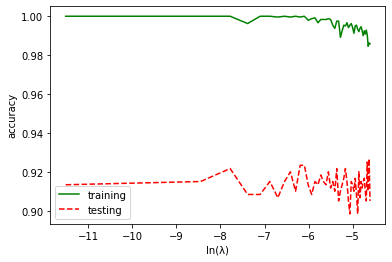

In [ ]:
plt.plot(np.log(lam),train_accuracy,color='green',label="training")
plt.plot(np.log(lam),test_accuracy,'--',color='red',label="testing")
plt.xlabel("ln"+"(\u03BB)")
plt.ylabel("accuracy")
plt.legend()
plt.show()
